PROJECT : RAINFALL PREDICTION IN SYDNEY

VIEWS ABOUT PROBLEM STATEMENT:

1. Context and Problem Background: The problem statement is clear, and the goal is to predict rainfall in Sydney using classification models. This sets the stage for exploring the dataset and developing a predictive model.

2. Data Description: The dataset contains 18 columns, including the target variable RainToday, which is essential for understanding the scope of the project. The dataset likely includes various weather-related features, such as temperature, humidity, wind speed, and more, which will be used to train and test the classification models.

3. Classification Task: The primary objective is correctly identified as a classification task, where the goal is to predict a binary outcome, specifically whether it will rain or not on a given day.

4. Role of Statistics: Statistics play a crucial role in building and evaluating the performance of the classification models. This is vital in ensuring that the models are reliable and effective in predicting rainfall.

5. Data Preprocessing: Data preprocessing is essential in preparing the data for modeling, including handling missing values, outliers, categorical variables, normalization, and feature selection. This step is critical in ensuring that the models are trained on high-quality data and produce accurate results.

6. Benefits of Machine Learning: Machine learning models can analyze large datasets and identify complex patterns, enabling the development of accurate rainfall prediction models. This can help authorities and citizens make informed decisions about daily activities, infrastructure planning, and resource allocation.

7. Competitive Advantage: By developing an accurate rainfall prediction model, authorities can improve their response to weather events, reduce the risk of flooding, and enhance public safety. This can also help in optimizing resource allocation, such as water management and infrastructure planning, ultimately driving economic growth and development.

APPROACH FOR SOLVING: Predicting Rainfall in Sydney

Step 1: Data Ingestion and Exploration

a. Load the dataset into a Jupyter Notebook and import necessary libraries, such as Pandas, NumPy, and Matplotlib. 
b. Perform initial data exploration to understand the dataset's structure, summary statistics, and data quality.

Step 2: Data Preprocessing

a Handling Missing Values: Decide on a strategy to handle missing values, such as imputation, interpolation, or deletion.
b. Handling Outliers: Identify and address outliers, which can significantly impact model performance.
c. Handling Categorical Variables: Convert categorical variables into numerical variables using techniques like one-hot encoding, label encoding, or binary encoding.
d. Feature Engineering: Extract relevant features from the existing dataset, such as weather patterns, time-based features, and spatial features.
e. Data Normalization/Scaling: Normalize or scale the data to ensure that all features are on the same scale.


Step 3: Data Splitting

Split the preprocessed data into training and testing sets using techniques like stratified sampling to ensure that the split is representative of the original data.

Step 4: Training and Testing Classification Models

Train and test multiple classification models, such as:

a. Decision Trees
b. Random Forest
c. XGBclassifier
d. Bagging

Use metrics like accuracy, precision, recall, and ROC-AUC to evaluate model performance.

Step 5: Model Selection and Hyperparameter Tuning

Compare the performance of each model and select the one with the best accuracy. Perform hyperparameter tuning for the selected model using techniques like grid search, random search.

Step 6: Model Improvement and Ensemble Methods

Consider additional techniques for model improvement, such as:

Feature Engineering: Extract additional features from the existing dataset.
Hyperparameter Tuning: Perform hyperparameter tuning for the selected model.
Ensemble Methods: Combine the predictions of multiple models to improve overall performance.

IN EACH STEP 2-3 POINTS ARE EXPLAIND BRIEFLY.
VIZULISATION IS PROVIDED.



Step 1: Data Ingestion and Exploration


UPDATE/UPLOAD DATASET IN JUPYTER NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('sydneyrainprediction.csv')

In [3]:
#Dummy Variable 
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)


In [4]:

for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)

In [5]:
df.head(100)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5/6/2008,Sydney,11.8,23.6,0.0,3.4,3.1,74.0,48.0,1017.1,1013.3,6.0,7.0,13.7,21.1,0,0
96,5/7/2008,Sydney,13.0,23.0,0.0,3.6,9.4,57.0,44.0,1014.3,1011.8,1.0,3.0,16.5,22.0,0,0
97,5/8/2008,Sydney,11.0,21.8,0.0,3.2,10.2,63.0,45.0,1019.2,1017.5,1.0,1.0,14.0,20.8,0,0
98,5/9/2008,Sydney,11.0,21.9,0.0,3.2,10.1,75.0,60.0,1021.4,1020.2,0.0,1.0,14.3,20.6,0,0


In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3334 non-null   float64
 3   MaxTemp           3335 non-null   float64
 4   Rainfall          3331 non-null   float64
 5   Evaporation       3286 non-null   float64
 6   Sunshine          3321 non-null   float64
 7   Humidity9am       3323 non-null   float64
 8   Humidity3pm       3324 non-null   float64
 9   Pressure9am       3317 non-null   float64
 10  Pressure3pm       3318 non-null   float64
 11  Cloud9am          2771 non-null   float64
 12  Cloud3pm          2776 non-null   float64
 13  Temp9am           3333 non-null   float64
 14  Temp3pm           3333 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


Step 2: Data Preprocessing

In [16]:
# Check for missing values
print(df.isnull().sum())

Date                  0
Location              0
MinTemp               3
MaxTemp               2
Rainfall              6
Evaporation          51
Sunshine             16
Humidity9am          14
Humidity3pm          13
Pressure9am          20
Pressure3pm          19
Cloud9am            566
Cloud3pm            561
Temp9am               4
Temp3pm               4
RainToday_Yes         0
RainTomorrow_Yes      0
dtype: int64


In [18]:
# Handle missing values
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())


In [20]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [22]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2/1/2008,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2/2/2008,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2/3/2008,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2/4/2008,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2/5/2008,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [24]:
df.shape

(3337, 17)

In [26]:
df.loc[21]

Date                2/22/2008
Location               Sydney
MinTemp                  19.1
MaxTemp                  25.4
Rainfall                  0.4
Evaporation               4.4
Sunshine                  9.4
Humidity9am              77.0
Humidity3pm              66.0
Pressure9am            1009.2
Pressure3pm            1003.1
Cloud9am                  4.0
Cloud3pm                  1.0
Temp9am                  22.3
Temp3pm                  24.9
RainToday_Yes               0
RainTomorrow_Yes            0
Name: 21, dtype: object


OUTLINERS 

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

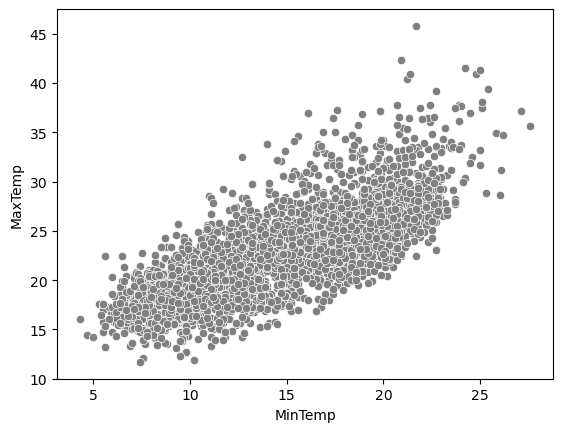

In [29]:
sns.scatterplot(x = df['MinTemp'], y = df['MaxTemp'],color = 'grey')

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

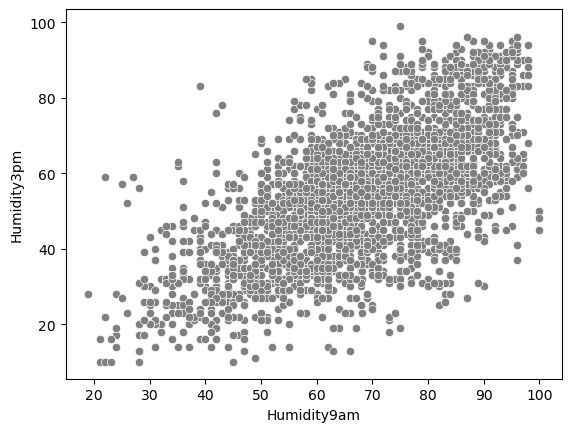

In [31]:
sns.scatterplot(x = df['Humidity9am'], y = df['Humidity3pm'],color = 'grey')



<Axes: xlabel='Pressure9am', ylabel='Pressure3pm'>

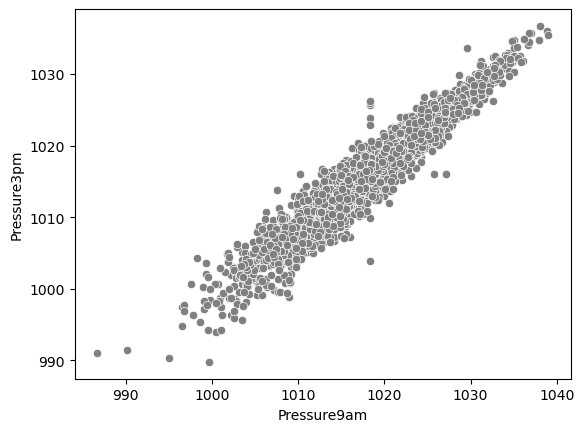

In [33]:
sns.scatterplot(x = df['Pressure9am'], y = df['Pressure3pm'],color = 'grey')

<Axes: xlabel='Cloud9am', ylabel='Cloud3pm'>

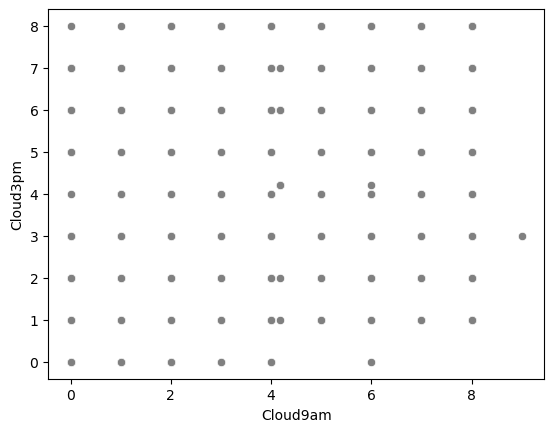

In [35]:
sns.scatterplot(x = df['Cloud9am'], y = df['Cloud3pm'],color = 'grey')

<Axes: xlabel='RainToday_Yes', ylabel='RainTomorrow_Yes'>

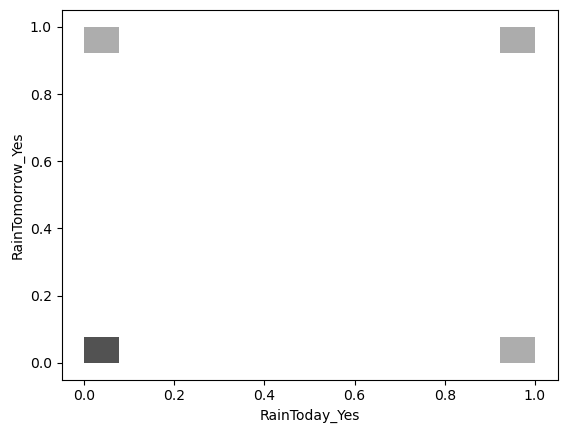

In [37]:
sns.histplot(x = df['RainToday_Yes'], y = df['RainTomorrow_Yes'],color = 'grey')

<Axes: ylabel='Rainfall'>

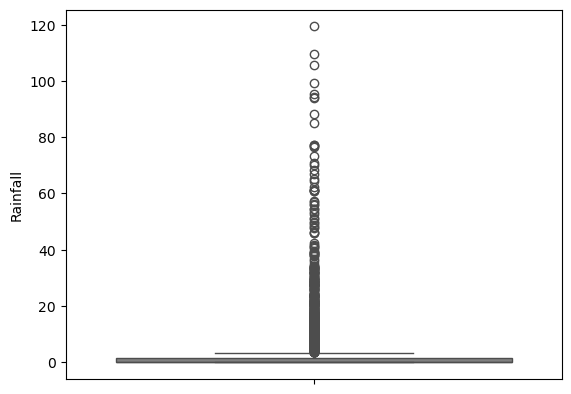

In [39]:
sns.boxplot(df['Rainfall'],color ='grey')

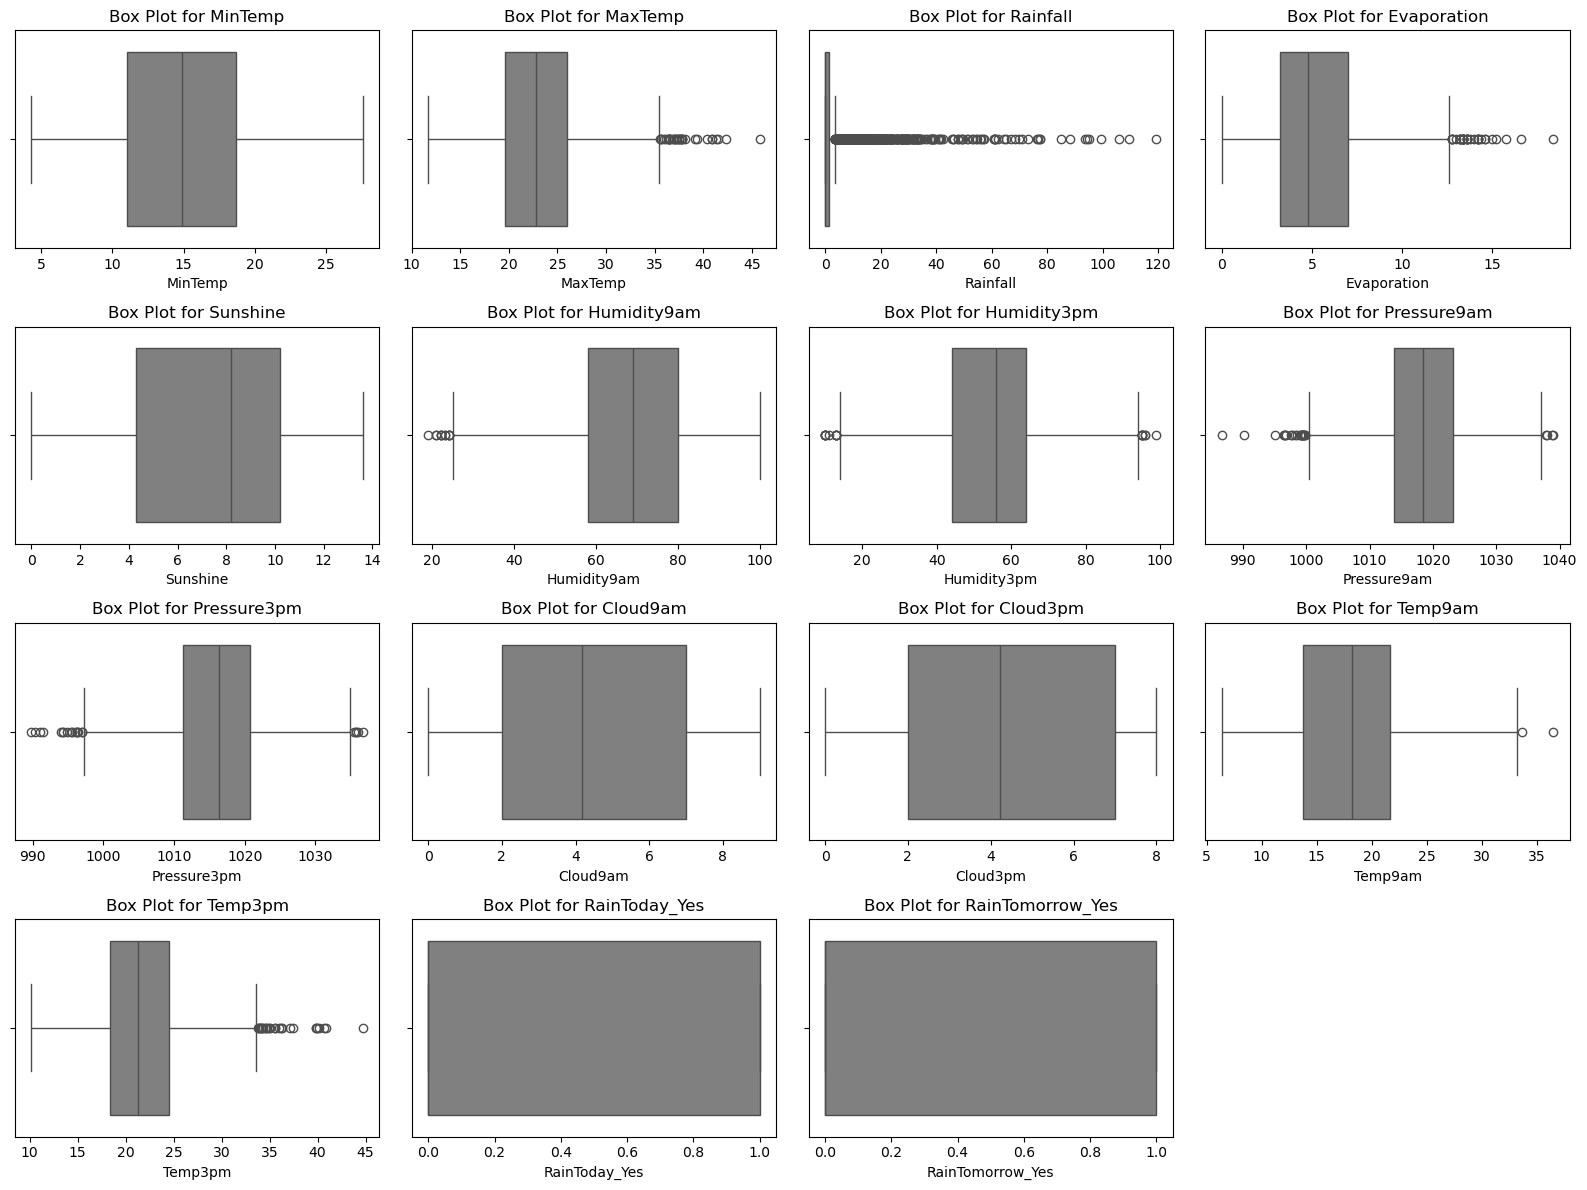

In [41]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:16]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col], color='grey') 
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

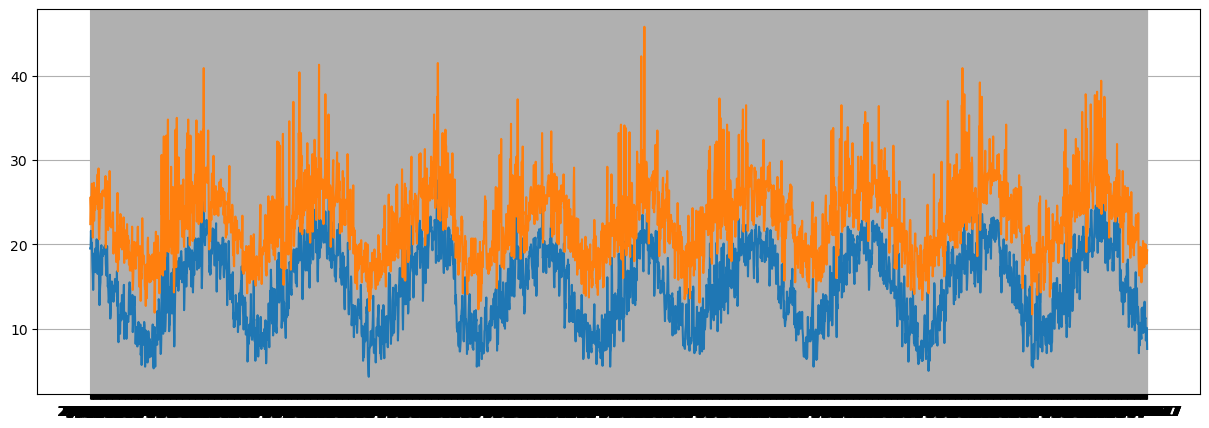

In [43]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Date'], df[['MinTemp', 'MaxTemp']])
plt.grid();


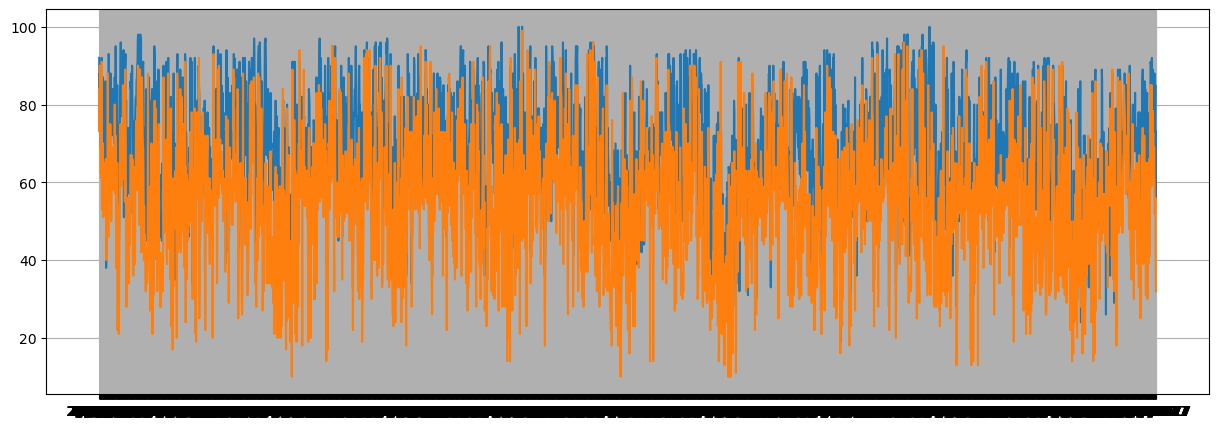

In [45]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Date'], df[['Humidity9am', 'Humidity3pm']])
plt.grid();

CORRELATION: 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


In [50]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)


In [52]:
df = pd.get_dummies(df, columns=['Location'])

<Axes: >

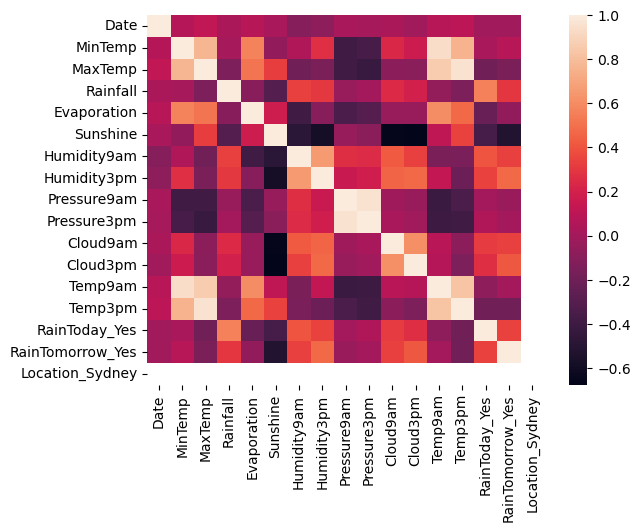

In [54]:
corr = df.corr()
sns.heatmap(data=corr)

<Axes: ylabel='count'>

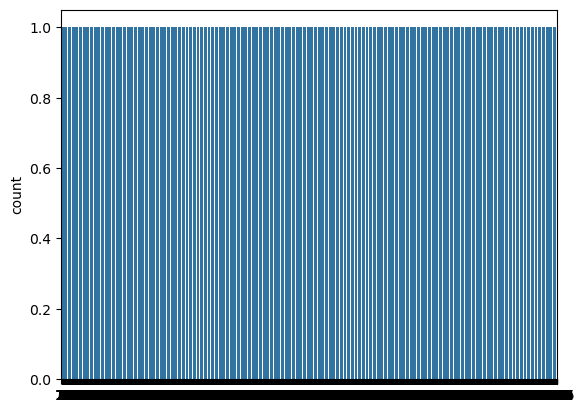

In [56]:
sns.countplot(data=df.Date)

In [58]:
df.loc[21]

Date                1203638400.0
MinTemp                     19.1
MaxTemp                     25.4
Rainfall                     0.4
Evaporation                  4.4
Sunshine                     9.4
Humidity9am                 77.0
Humidity3pm                 66.0
Pressure9am               1009.2
Pressure3pm               1003.1
Cloud9am                     4.0
Cloud3pm                     1.0
Temp9am                     22.3
Temp3pm                     24.9
RainToday_Yes                  0
RainTomorrow_Yes               0
Location_Sydney             True
Name: 21, dtype: object

In [60]:
grouped = df.groupby('Location_Sydney')
SY = grouped.get_group(True)  # or grouped.get_group(1) depending on the values in the column

In [62]:
SY.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney
0,1.201824e+09,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,True
1,1.201910e+09,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,True
2,1.201997e+09,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,True
3,1.202083e+09,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,True
4,1.202170e+09,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,True


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'RainToday_Yes'}>,
        <Axes: title={'center': 'RainTomorrow_Yes'}>]], dtype=object)

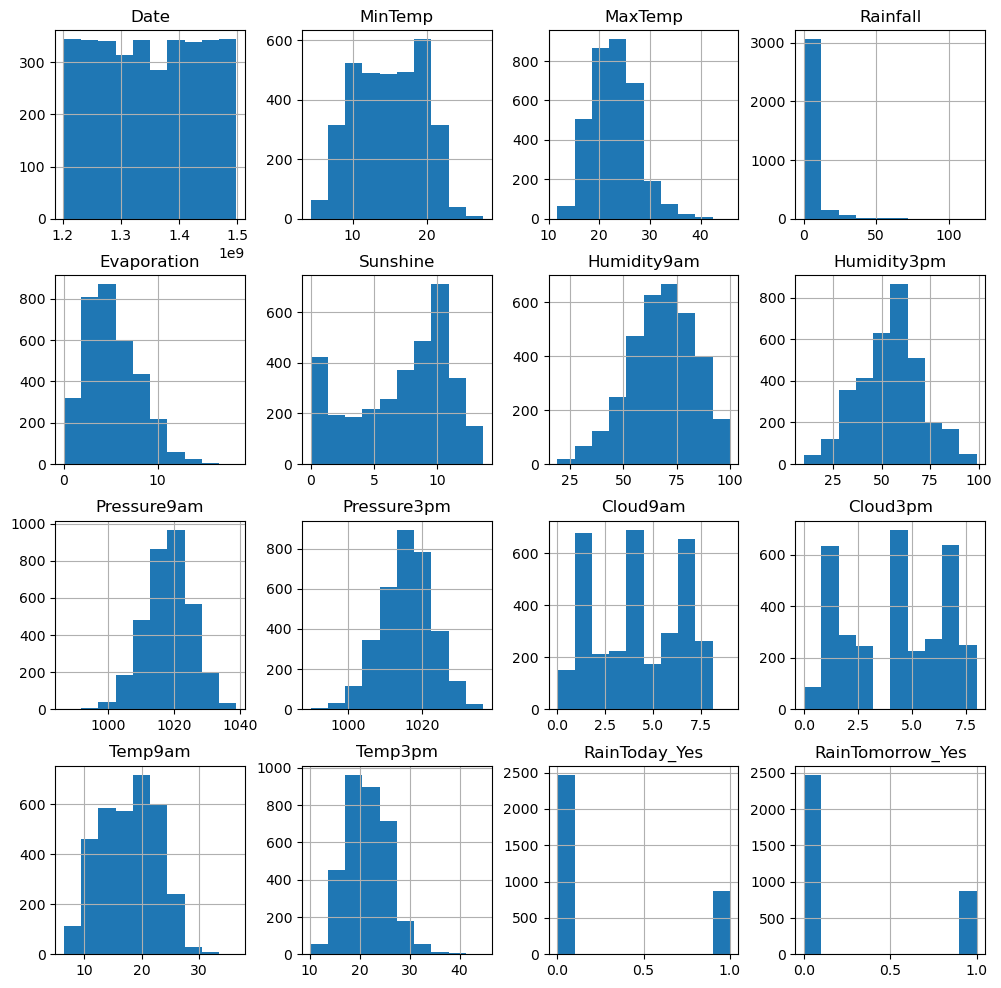

In [64]:
SY.hist(figsize=(12,12))

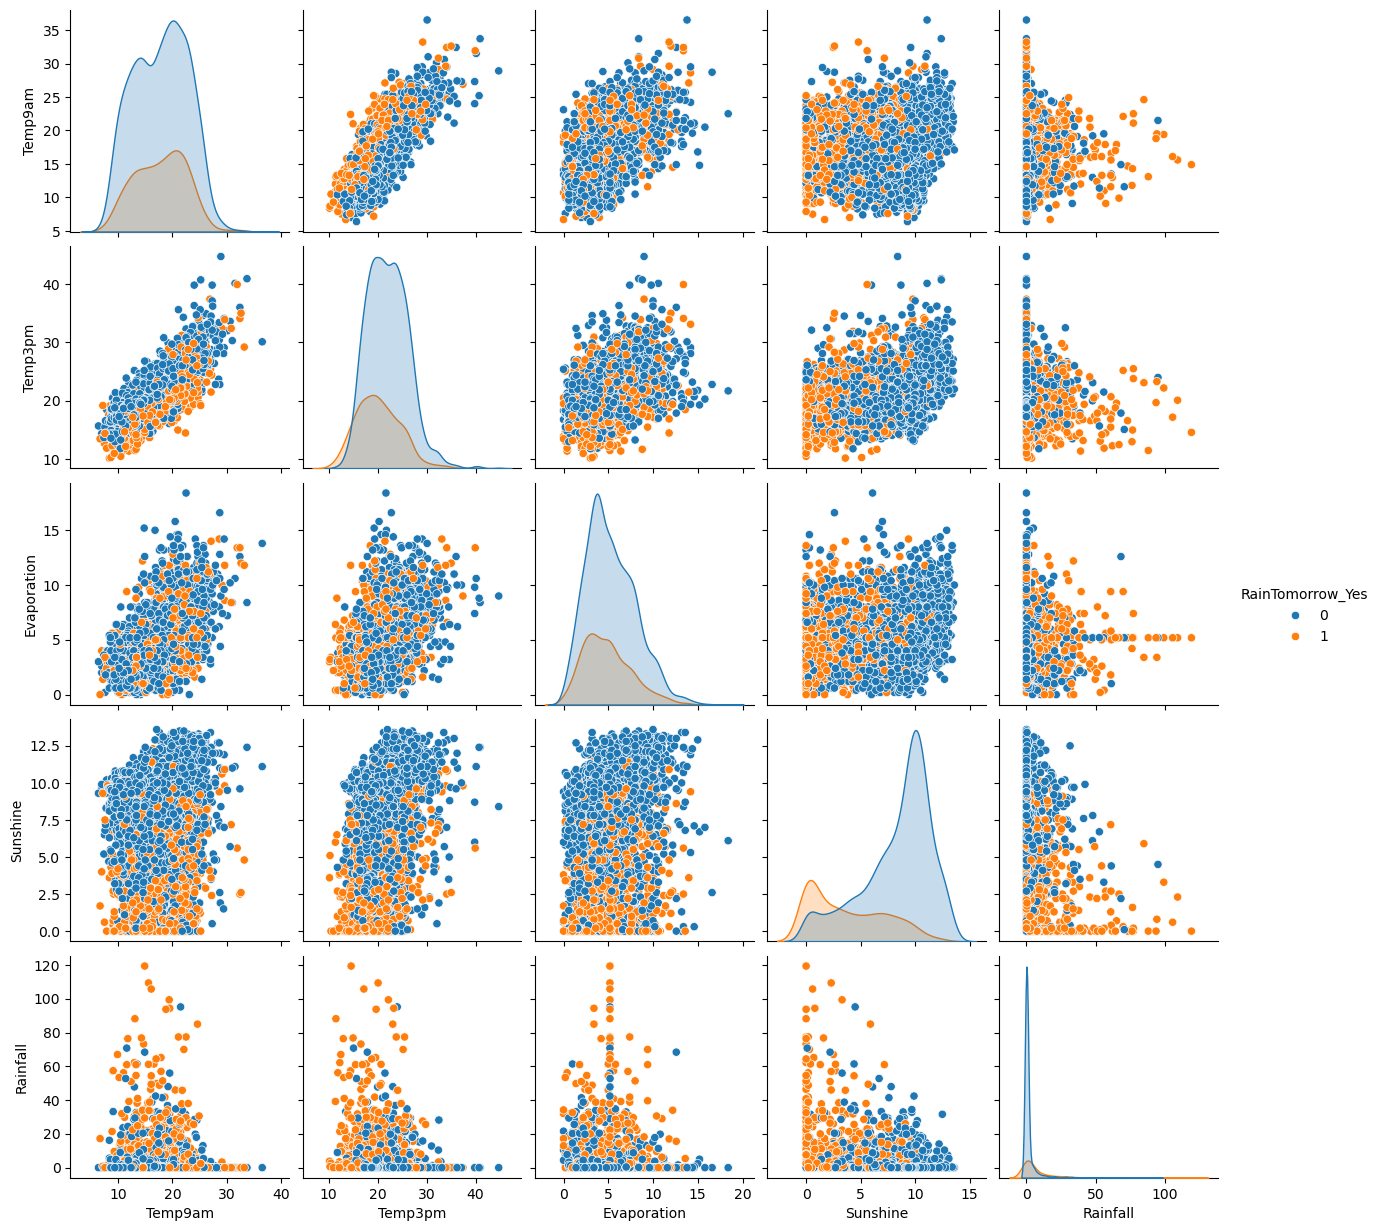

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.pairplot(df, vars=['Temp9am', 'Temp3pm', 'Evaporation','Sunshine','Rainfall'], hue='RainTomorrow_Yes')
plt.show()

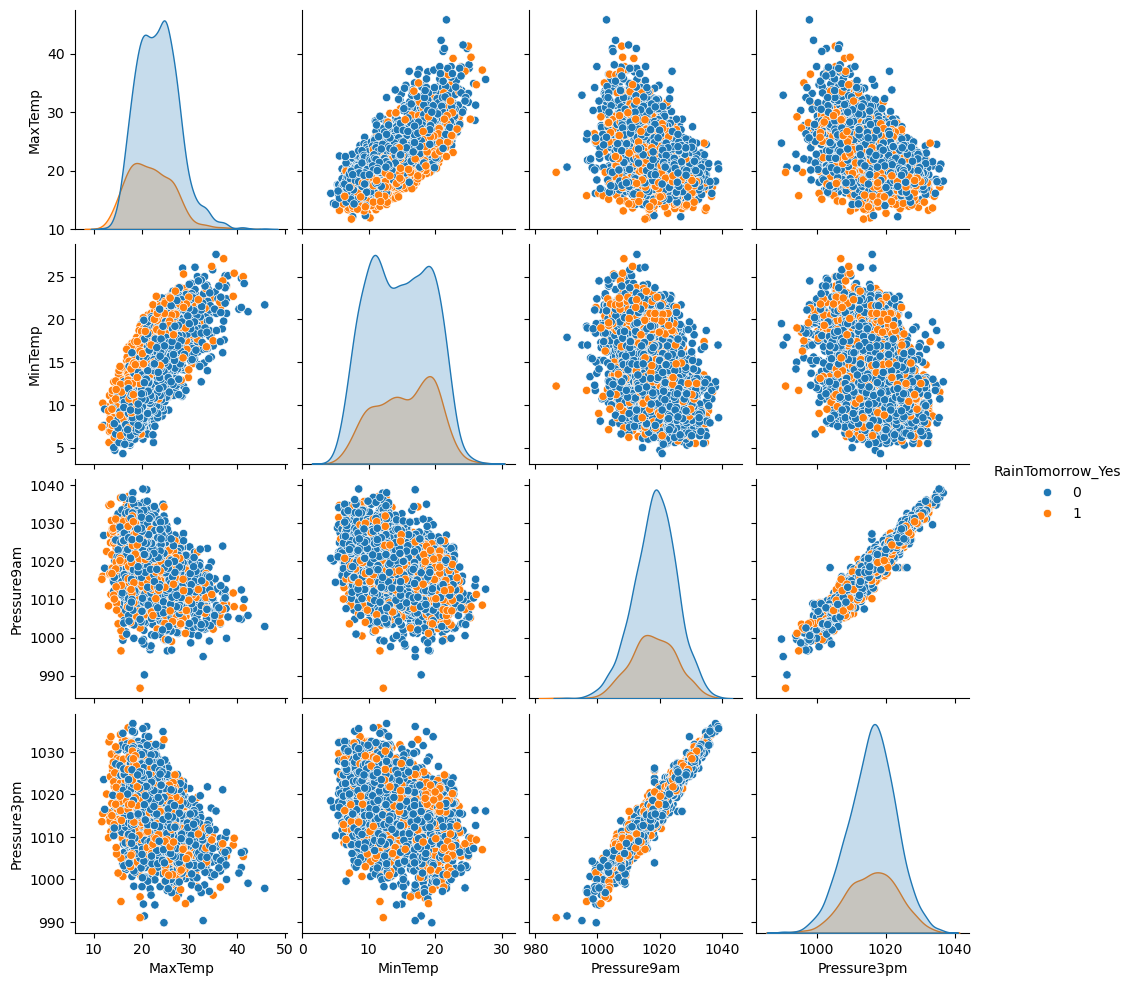

In [68]:
sns.pairplot( df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow_Yes' )
plt.show()

Step 3: Data Splitting

Split the preprocessed data into training and testing sets using techniques like stratified sampling to ensure that the split is representative of the original data.

In [71]:
df = pd.read_csv('sydneyrainprediction.csv')

In [73]:
#Dummy Variable 
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [75]:
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']

In [77]:
x_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

Step 4: Training and Testing Classification Models

Train and test multiple classification models, such as:

a. Decision Trees
b. Random Forest
c. XGBclassifier
d. Bagging

Use metrics like accuracy, precision, recall, and ROC-AUC to evaluate model performance.


DECISION TREE MODEL

In [81]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score


In [83]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='roc_auc')
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [85]:
y_train_pred = tree_cv.best_estimator_.predict(x_train)
y_test_pred = tree_cv.best_estimator_.predict(x_test)

In [87]:
cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)
rcs_train_ct = recall_score(y_train, y_train_pred)
rcs_test_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

In [89]:
#Print the result 
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best paras is {}".format(tree_cv.best_score_))


Confusion Matrix (Training Data):
[[1905   83]
 [ 320  361]]

Accuracy Score (Training Data): 0.8490071187710753

Precision Score (Training Data): 0.8130630630630631

Recall Score (Training Data): 0.5301027900146843

ROC AUC Score (Training Data): 0.7441761434982878

------------------------------------------------------

Confusion Matrix (Testing Data):
[[446  38]
 [ 90  94]]

Accuracy Score (Testing Data): 0.8083832335329342

Precision Score (Test Data): 0.7121212121212122

Recall Score (Test Data): 0.5108695652173914

ROC AUC Score (Test Data): 0.7161785842615883

------------------------------------------------------
Tuned Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best paras is 0.8310148255861082


RANDOM FOREST MODEL

In [92]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 4],
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [93]:
# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_


In [94]:
# Predict values using the best model
y_train_pred_rf = best_rf_classifier.predict(x_train)
y_test_pred_rf = best_rf_classifier.predict(x_test)


In [95]:
# Model Performance
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)


In [96]:
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rf)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rf)
print("\nAccuracy Score (Testing Data):", acs_test_rf)
print("\nPrecision Score (Test Data):", pcs_test_rf)
print("\nRecall Score (Test Data):", rcs_test_rf)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_rf)
print("\n------------------------------------------------------")


Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[1957   31]
 [ 193  488]]

Accuracy Score (Training Data): 0.9160734357437242

Precision Score (Training Data): 0.9402697495183044

Recall Score (Training Data): 0.7165932452276065

ROC AUC Score (Training Data): 0.8504998419296986

------------------------------------------------------

Confusion Matrix (Testing Data):
[[456  28]
 [ 85  99]]

Accuracy Score (Testing Data): 0.8308383233532934

Precision Score (Test Data): 0.7795275590551181

Recall Score (Test Data): 0.5380434782608695

ROC AUC Score (Test Data): 0.740096119295724

------------------------------------------------------


In [102]:
print("Tuned Random Forest Parameters: {}".format(grid_search_rf.best_params_))
print("Best score is {}".format(grid_search_rf.best_score_))

Tuned Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score is 0.843015971318192


BAGGING CLASSIFIER MODEL

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
bagging_clf = BaggingClassifier(base_tree, random_state=42)

In [107]:
param_grid = {
    'n_estimators': [10, 50, 100]
}

In [109]:
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=42),
                                         random_state=42),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [111]:
best_params = grid_search.best_params_
best_bagging_clf = grid_search.best_estimator_

In [113]:
y_train_pred_bagging = best_bagging_clf.predict(x_train)
y_test_pred_bagging = best_bagging_clf.predict(x_test)


In [115]:
cfm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cfm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)
acs_train_bagging = accuracy_score(y_train, y_train_pred_bagging)
acs_test_bagging = accuracy_score(y_test, y_test_pred_bagging)
pcs_train_bagging = precision_score(y_train, y_train_pred_bagging)
pcs_test_bagging = precision_score(y_test, y_test_pred_bagging)
rcs_train_bagging = recall_score(y_train, y_train_pred_bagging)
rcs_test_bagging = recall_score(y_test, y_test_pred_bagging)
roc_auc_score_train_bagging = roc_auc_score(y_train, y_train_pred_bagging)
roc_auc_score_test_bagging = roc_auc_score(y_test, y_test_pred_bagging)

In [117]:
print("Best Hyperparameter:", best_params)
print("Bagging Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_bagging)
print("\nAccuracy Score (Training Data):", acs_train_bagging)
print("\nPrecision Score (Training Data):", pcs_train_bagging)
print("\nRecall Score (Training Data):", rcs_train_bagging)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_bagging)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_bagging)
print("\nAccuracy Score (Testing Data):", acs_test_bagging)
print("\nPrecision Score (Test Data):", pcs_test_bagging)
print("\nRecall Score (Test Data):", rcs_test_bagging)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_bagging)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 10}
Bagging Classifier Results:
Confusion Matrix (Training Data):
[[1933   55]
 [ 370  311]]

Accuracy Score (Training Data): 0.8407643312101911

Precision Score (Training Data): 0.8497267759562842

Recall Score (Training Data): 0.4566813509544787

ROC AUC Score (Training Data): 0.7145076774893118

------------------------------------------------------

Confusion Matrix (Testing Data):
[[466  18]
 [ 99  85]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Test Data): 0.8252427184466019

Recall Score (Test Data): 0.46195652173913043

ROC AUC Score (Test Data): 0.7123832195472511

------------------------------------------------------


In [119]:
print("Tuned Bagging Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))

Tuned Bagging Parameters: {'n_estimators': 10}
Best score is 0.8381441083909454


XGB CLASSIFIER MODEL

In [122]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [124]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100]
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [126]:
best_params = grid_search.best_params_
best_xgb_clf = grid_search.best_estimator_

In [128]:
y_train_pred_xgb = best_xgb_clf.predict(x_train)
y_test_pred_xgb = best_xgb_clf.predict(x_test)


In [130]:
cfm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cfm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

acs_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acs_test_xgb = accuracy_score(y_test, y_test_pred_xgb)

pcs_train_xgb = precision_score(y_train, y_train_pred_xgb)
pcs_test_xgb = precision_score(y_test, y_test_pred_xgb)

rcs_train_xgb = recall_score(y_train, y_train_pred_xgb)
rcs_test_xgb = recall_score(y_test, y_test_pred_xgb)

roc_auc_score_train_xgb = roc_auc_score(y_train, y_train_pred_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test, y_test_pred_xgb)


In [132]:
print("Best Hyperparameter:", best_params)
print("XGB Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_xgb)
print("\nAccuracy Score (Training Data):", acs_train_xgb)
print("\nPrecision Score (Training Data):", pcs_train_xgb)
print("\nRecall Score (Training Data):", rcs_train_xgb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_xgb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_xgb)
print("\nAccuracy Score (Testing Data):", acs_test_xgb)
print("\nPrecision Score (Test Data):", pcs_test_xgb)
print("\nRecall Score (Test Data):", rcs_test_xgb)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_xgb)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 50}
XGB Classifier Results:
Confusion Matrix (Training Data):
[[1925   63]
 [ 235  446]]

Accuracy Score (Training Data): 0.8883476957662045

Precision Score (Training Data): 0.8762278978388998

Recall Score (Training Data): 0.6549192364170338

ROC AUC Score (Training Data): 0.8116145477859816

------------------------------------------------------

Confusion Matrix (Testing Data):
[[448  36]
 [ 80 104]]

Accuracy Score (Testing Data): 0.8263473053892215

Precision Score (Test Data): 0.7428571428571429

Recall Score (Test Data): 0.5652173913043478

ROC AUC Score (Test Data): 0.7454186130075457

------------------------------------------------------


In [134]:
print("Tuned XGB Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))

Tuned XGB Parameters: {'n_estimators': 50}
Best score is 0.8377729058189459


Step 5: Model Selection and Hyperparameter Tuning

Compare the performance of each model and select the one with the best accuracy. Perform hyperparameter tuning for the selected model using techniques like grid search, random search.


In [137]:
df = pd.read_csv('Modelscomp.csv')

In [139]:
df.head()

,Model,Accuracy Score (Training Data),Precision Score (Training Data),Recall Score (Training Data),ROC AUC Score (Training Data),Accuracy Score (Testing Data),Precision Score (Test Data),Recall Score (Test Data),ROC AUC Score (Test Data),Best Hyperparameter
0,DecisionTreeClassifier,0.828025,0.697509,0.575624,0.745056,0.800898,0.660377,5.710000e+15,0.729541,0.831000
1,RandomForestClassifier,0.916073,0.940270,0.716593,0.850500,0.830838,0.779528,5.380435e-01,0.740096,0.843016
2,BaggingClassifier,0.840764,0.849727,0.456681,0.714508,0.824850,0.825243,4.619565e-01,0.712383,0.838144
3,XGBClassifier,0.888348,0.876228,0.654919,0.811615,0.826347,0.742857,5.652174e-01,0.745419,0.837773


In [141]:
df.describe()

,Accuracy Score (Training Data),Precision Score (Training Data),Recall Score (Training Data),ROC AUC Score (Training Data),Accuracy Score (Testing Data),Precision Score (Test Data),Recall Score (Test Data),ROC AUC Score (Test Data),Best Hyperparameter
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000
mean,0.868303,0.840933,0.600954,0.780419,0.820734,0.752001,1.427500e+15,0.731860,0.837483
std,0.041087,0.102894,0.112162,0.061858,0.013466,0.069763,2.855000e+15,0.014565,0.004938
min,0.828025,0.697509,0.456681,0.714508,0.800898,0.660377,4.619565e-01,0.712383,0.831000
25%,0.837580,0.811672,0.545888,0.737419,0.818862,0.722237,5.190217e-01,0.725252,0.836080
50%,0.864556,0.862977,0.615272,0.778335,0.825599,0.761192,5.516304e-01,0.734819,0.837959
75%,0.895279,0.892238,0.670338,0.821336,0.827470,0.790956,1.427500e+15,0.741427,0.839362
max,0.916073,0.940270,0.716593,0.850500,0.830838,0.825243,5.710000e+15,0.745419,0.843016


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Model                            4 non-null      object 
 1   Accuracy Score (Training Data)   4 non-null      float64
 2   Precision Score (Training Data)  4 non-null      float64
 3   Recall Score (Training Data)     4 non-null      float64
 4   ROC AUC Score (Training Data)    4 non-null      float64
 5   Accuracy Score (Testing Data)    4 non-null      float64
 6   Precision Score (Test Data)      4 non-null      float64
 7   Recall Score (Test Data)         4 non-null      float64
 8   ROC AUC Score (Test Data)        4 non-null      float64
 9   Best Hyperparameter              4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 452.0+ bytes


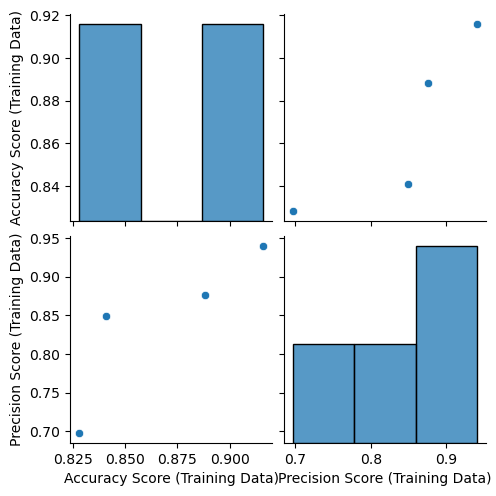

In [145]:
sns.pairplot( df, vars=('Accuracy Score (Training Data)','Precision Score (Training Data)'))
plt.show()

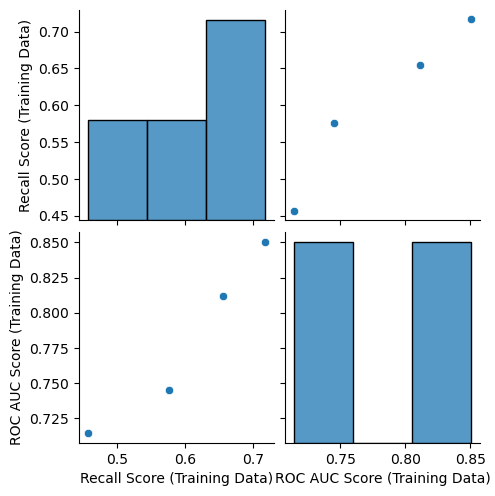

In [147]:
sns.pairplot( df, vars=('Recall Score (Training Data)','ROC AUC Score (Training Data)'))
plt.show()

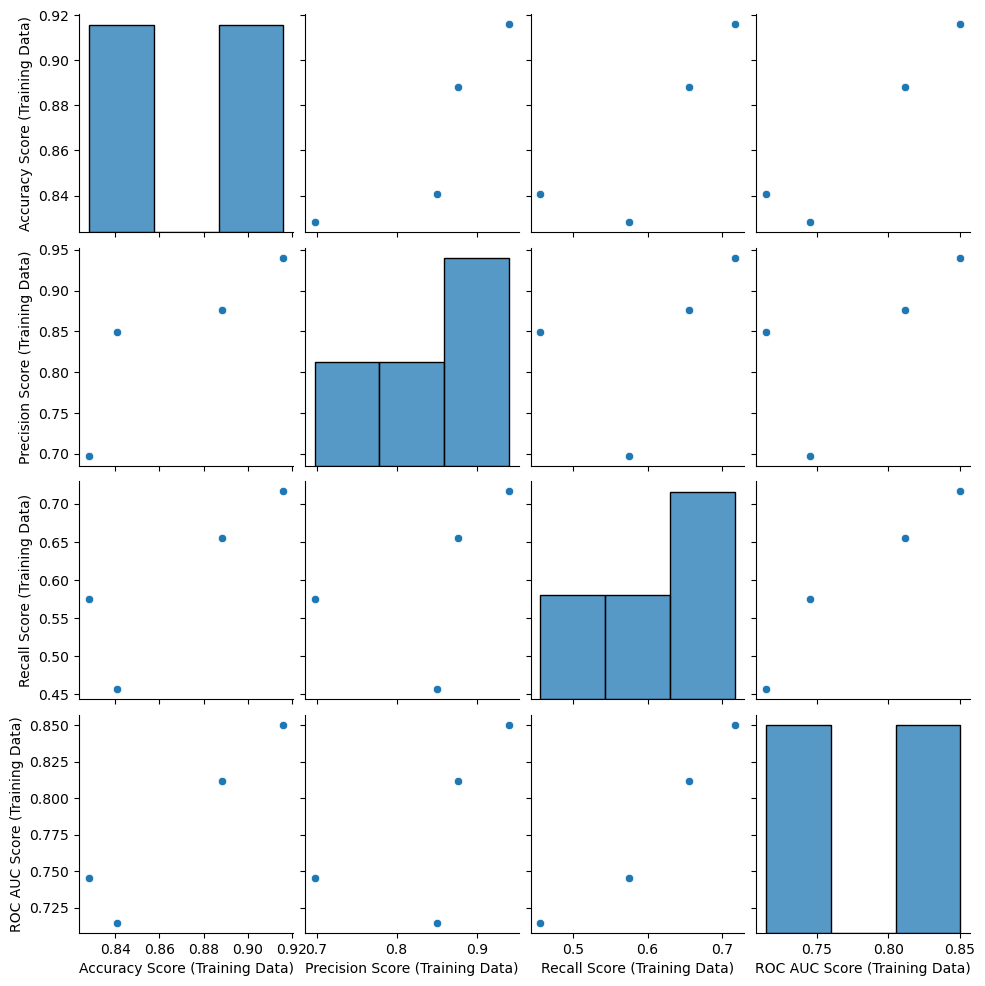

In [149]:
sns.pairplot( df, vars=('Accuracy Score (Training Data)','Precision Score (Training Data)','Recall Score (Training Data)','ROC AUC Score (Training Data)'))
plt.show()

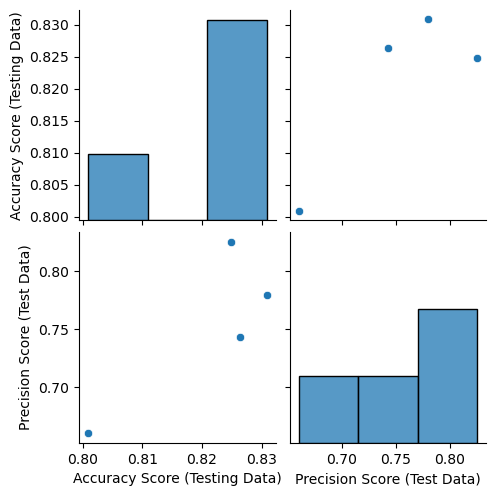

In [151]:
sns.pairplot( df, vars=('Accuracy Score (Testing Data)','Precision Score (Test Data)'))
plt.show()

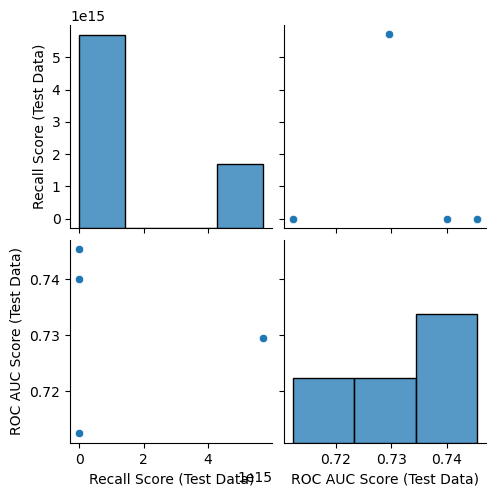

In [153]:
sns.pairplot( df, vars=('Recall Score (Test Data)','ROC AUC Score (Test Data)'))
plt.show()

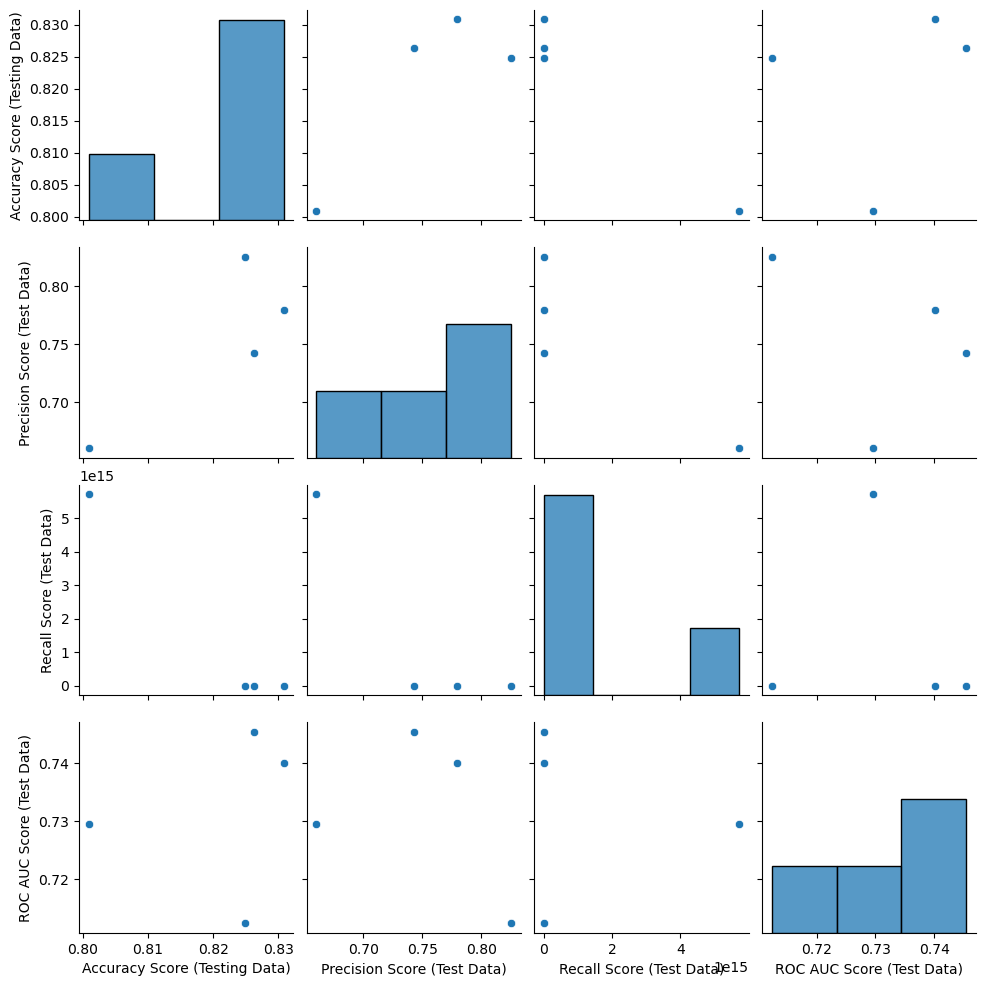

In [154]:
sns.pairplot( df, vars=('Accuracy Score (Testing Data)','Precision Score (Test Data)','Recall Score (Test Data)','ROC AUC Score (Test Data)'))
plt.show()

<Axes: ylabel='Best Hyperparameter'>

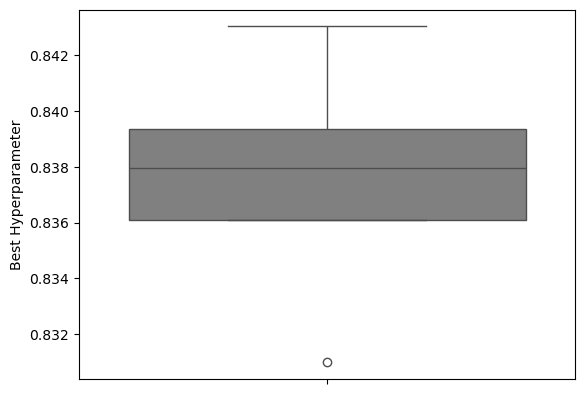

In [157]:
sns.boxplot(df['Best Hyperparameter'],color ='grey')

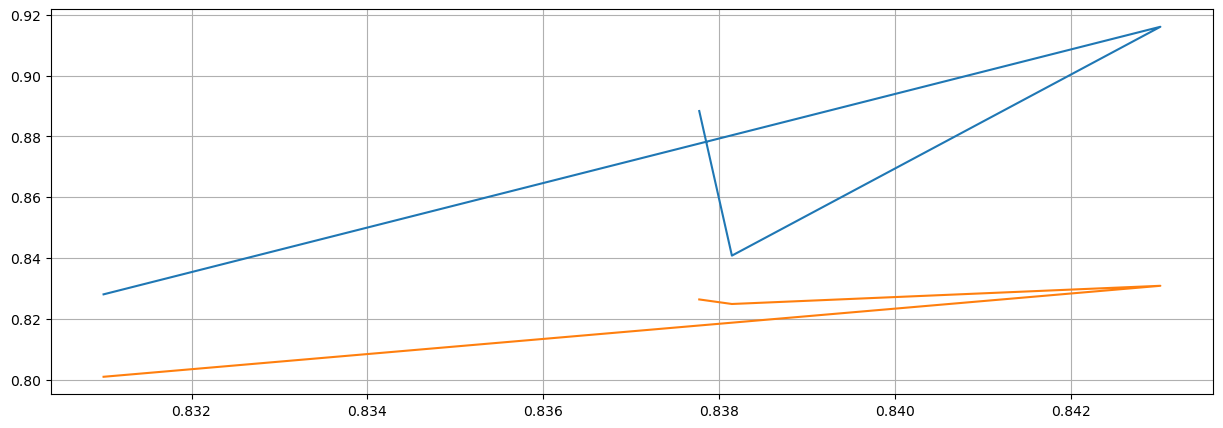

In [159]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Best Hyperparameter'], df[['Accuracy Score (Training Data)','Accuracy Score (Testing Data)']])
plt.grid();

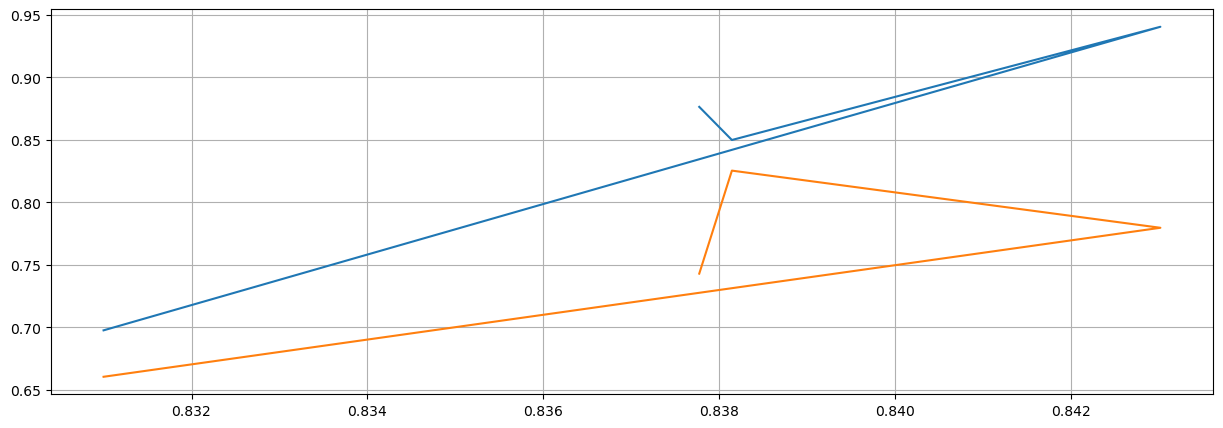

In [161]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Best Hyperparameter'], df[['Precision Score (Training Data)','Precision Score (Test Data)']])
plt.grid();

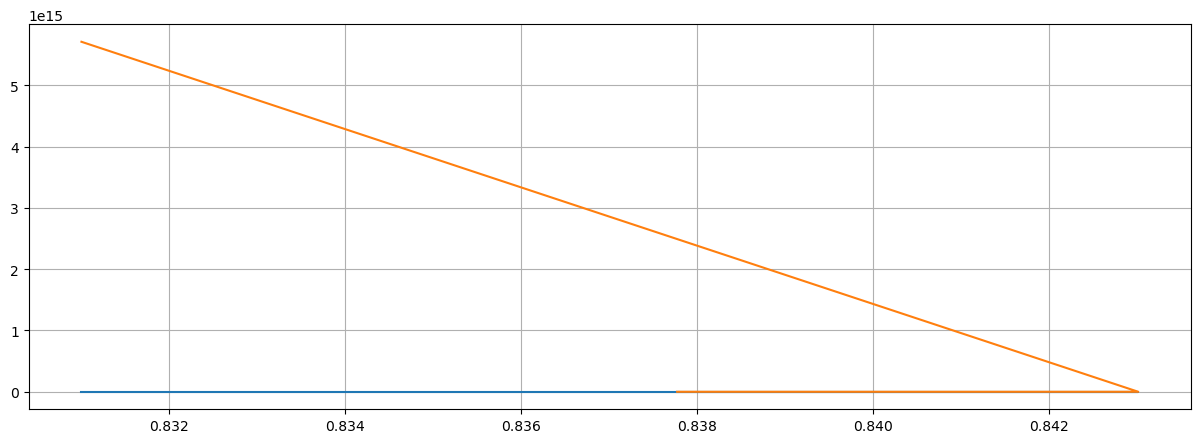

In [163]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Best Hyperparameter'], df[['Recall Score (Training Data)','Recall Score (Test Data)']])
plt.grid();

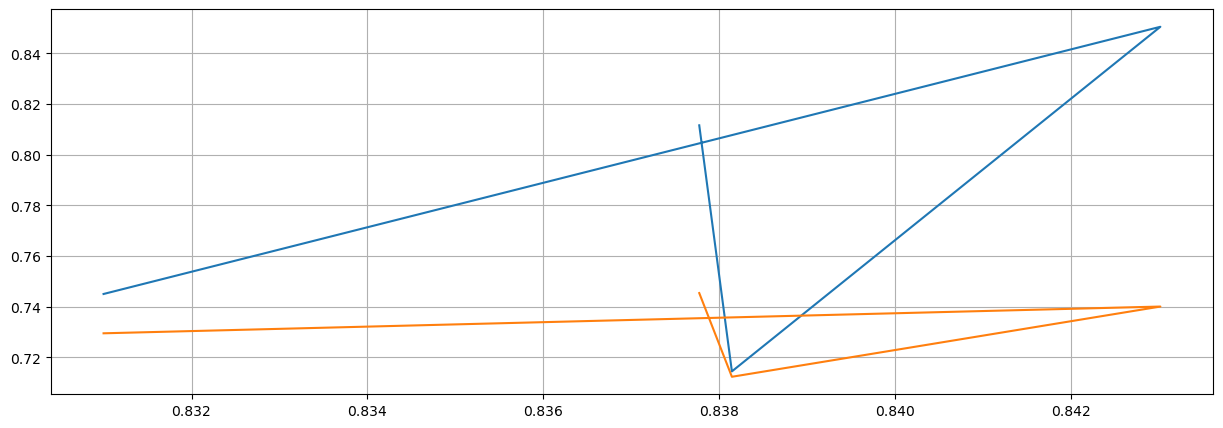

In [165]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Best Hyperparameter'], df[['ROC AUC Score (Training Data)','ROC AUC Score (Test Data)']])
plt.grid();

In [168]:
df = pd.read_csv('Modelscomp.csv')

In [170]:
df.head()

,Model,Accuracy Score (Training Data),Precision Score (Training Data),Recall Score (Training Data),ROC AUC Score (Training Data),Accuracy Score (Testing Data),Precision Score (Test Data),Recall Score (Test Data),ROC AUC Score (Test Data),Best Hyperparameter
0,DecisionTreeClassifier,0.828025,0.697509,0.575624,0.745056,0.800898,0.660377,5.710000e+15,0.729541,0.831000
1,RandomForestClassifier,0.916073,0.940270,0.716593,0.850500,0.830838,0.779528,5.380435e-01,0.740096,0.843016
2,BaggingClassifier,0.840764,0.849727,0.456681,0.714508,0.824850,0.825243,4.619565e-01,0.712383,0.838144
3,XGBClassifier,0.888348,0.876228,0.654919,0.811615,0.826347,0.742857,5.652174e-01,0.745419,0.837773


In [213]:
df.describe()

,Accuracy Score (Training Data),Precision Score (Training Data),Recall Score (Training Data),ROC AUC Score (Training Data),Accuracy Score (Testing Data),Precision Score (Test Data),Recall Score (Test Data),ROC AUC Score (Test Data),Best Hyperparameter
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000
mean,0.868303,0.840933,0.600954,0.780419,0.820734,0.752001,1.427500e+15,0.731860,0.837483
std,0.041087,0.102894,0.112162,0.061858,0.013466,0.069763,2.855000e+15,0.014565,0.004938
min,0.828025,0.697509,0.456681,0.714508,0.800898,0.660377,4.619565e-01,0.712383,0.831000
25%,0.837580,0.811672,0.545888,0.737419,0.818862,0.722237,5.190217e-01,0.725252,0.836080
50%,0.864556,0.862977,0.615272,0.778335,0.825599,0.761192,5.516304e-01,0.734819,0.837959
75%,0.895279,0.892238,0.670338,0.821336,0.827470,0.790956,1.427500e+15,0.741427,0.839362
max,0.916073,0.940270,0.716593,0.850500,0.830838,0.825243,5.710000e+15,0.745419,0.843016


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Model                            4 non-null      object 
 1   Accuracy Score (Training Data)   4 non-null      float64
 2   Precision Score (Training Data)  4 non-null      float64
 3   Recall Score (Training Data)     4 non-null      float64
 4   ROC AUC Score (Training Data)    4 non-null      float64
 5   Accuracy Score (Testing Data)    4 non-null      float64
 6   Precision Score (Test Data)      4 non-null      float64
 7   Recall Score (Test Data)         4 non-null      float64
 8   ROC AUC Score (Test Data)        4 non-null      float64
 9   Best Hyperparameter              4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 452.0+ bytes


In [215]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb

# Load data from CSV
df = pd.read_csv('Modelscomp.csv')

# Inspect the data to confirm columns
print("Columns in the dataset:", df.columns)
print("First few rows of the dataset:")
print(df.head())

# Ensure the columns are correctly named and clean up column names if necessary
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace from column names

# Check the column names again after cleanup
print("Cleaned columns in the dataset:", df.columns)

# Verify that the required columns exist
required_columns = ['Model', 'Accuracy Score (Testing Data)', 'Precision Score (Test Data)', 
                    'Recall Score (Test Data)', 'ROC AUC Score (Test Data)']
for col in required_columns:
    if col.lower() not in [c.lower() for c in df.columns]:
        raise KeyError(f"'{col}' column not found in the dataset. Available columns: {df.columns}")

# Drop non-numeric columns (e.g., 'Model')
x = df.drop(columns=['Model', 'Accuracy Score (Testing Data)'])

# Ensure all data in `x` is numeric
x = x.apply(pd.to_numeric, errors='coerce')

# Define the target variable (for regression)
y = df['Accuracy Score (Testing Data)']

# Initialize LOOCV
loo = LeaveOneOut()

# Define models and hyperparameter grids for regression
models = {
    'DecisionTree': (DecisionTreeRegressor(), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'Bagging': (BaggingRegressor(), {  # Use default base estimator
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0]
    }),
    'XGBoost': (xgb.XGBRegressor(eval_metric='mlogloss'), {  # Ensure you use XGBRegressor for regression
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    })
}

# Initialize results list
results = []

for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearch for {model_name}...")
    
    # Use LOOCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=loo)
    grid_search.fit(x, y)
    
    best_model = grid_search.best_estimator_
    
    # Since we are using LOOCV, we will predict on the same data points used for training
    y_pred = best_model.predict(x)
    
    # Store results
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Score': -grid_search.best_score_,  # Negate to get the positive MSE
        'Mean Squared Error': mean_squared_error(y, y_pred),
        'R^2 Score': r2_score(y, y_pred)
    })

# Analyze results
results_df = pd.DataFrame(results)
print("Model comparison results:")
print(results_df)


Columns in the dataset: Index(['Model', 'Accuracy Score (Training Data)',
       'Precision Score (Training Data)', 'Recall Score (Training Data)',
       'ROC AUC Score (Training Data)', 'Accuracy Score (Testing Data)',
       'Precision Score (Test Data)', 'Recall Score (Test Data)',
       'ROC AUC Score (Test Data)', 'Best Hyperparameter'],
      dtype='object')
First few rows of the dataset:
                    Model  Accuracy Score (Training Data)  \
0  DecisionTreeClassifier                        0.828025   
1  RandomForestClassifier                        0.916073   
2       BaggingClassifier                        0.840764   
3           XGBClassifier                        0.888348   

   Precision Score (Training Data)  Recall Score (Training Data)  \
0                         0.697509                      0.575624   
1                         0.940270                      0.716593   
2                         0.849727                      0.456681   
3                     

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor

# Define the models
models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(estimator=DecisionTreeRegressor()),
    XGBRegressor()
]


# Define the hyperparameter tuning space for each model
param_grids = [
    {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
    {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]},
    {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.8, 1.0]},
    {'max_depth': [None, 5, 10], 'learning_rate': [0.1, 0.5, 1.0], 'n_estimators': [10, 50, 100]}
]

# Perform hyperparameter tuning and evaluation for each model
results = []
for model, param_grid in zip(models, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    y_pred_train = grid_search.best_estimator_.predict(x_train)
    y_pred_test = grid_search.best_estimator_.predict(x_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    results.append({
        'Model': model.__class__.__name__,
        'MSE (Train)': mse_train,
        'MSE (Test)': mse_test,
        'Best Hyperparameters': grid_search.best_params_
    })

# Create a pandas dataframe to store the results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best model based on the MSE score on the test data
best_model = results_df.loc[results_df['MSE (Test)'].idxmin()]
print(f'Best Model: {best_model["Model"]}')
print(f'Best Hyperparameters: {best_model["Best Hyperparameters"]}')

                   Model  MSE (Train)  MSE (Test)  \
0  DecisionTreeRegressor     0.000136    0.000182   
1  RandomForestRegressor     0.000024    0.000023   
2       BaggingRegressor     0.000025    0.000042   
3           XGBRegressor     0.000044    0.000088   

                                Best Hyperparameters  
0        {'max_depth': None, 'min_samples_split': 5}  
1               {'max_depth': 5, 'n_estimators': 10}  
2           {'max_samples': 1.0, 'n_estimators': 50}  
3  {'learning_rate': 0.1, 'max_depth': None, 'n_e...  
Best Model: RandomForestRegressor
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 10}


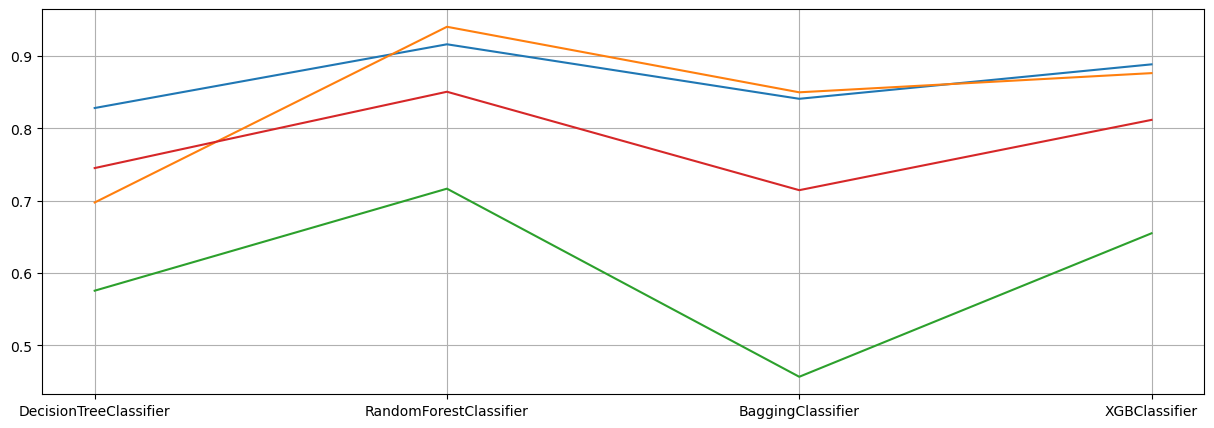

In [217]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Model'], df[['Accuracy Score (Training Data)','Precision Score (Training Data)','Recall Score (Training Data)','ROC AUC Score (Training Data)']])
plt.grid();

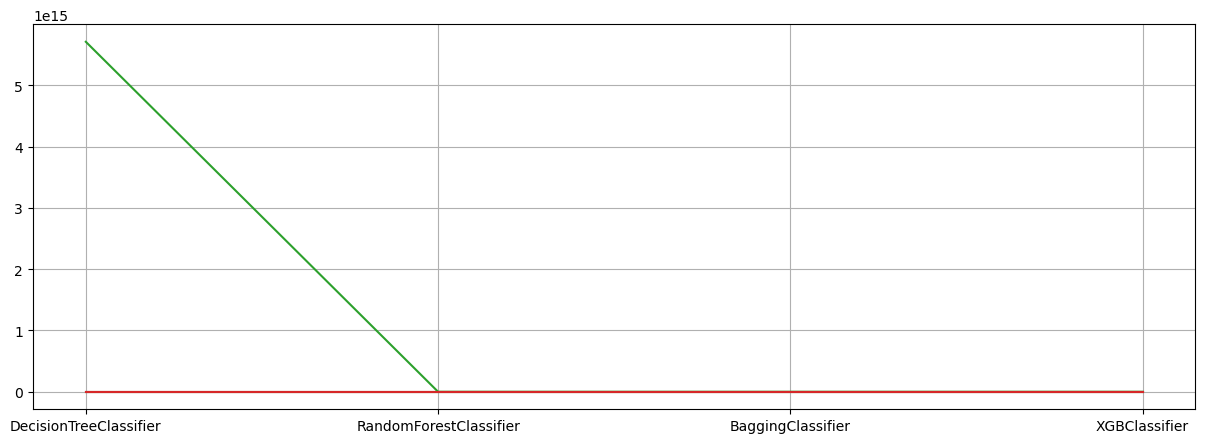

In [218]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Model'], df[['Precision Score (Test Data)', 'Precision Score (Test Data)', 'Recall Score (Test Data)','ROC AUC Score (Test Data)']])
plt.grid();

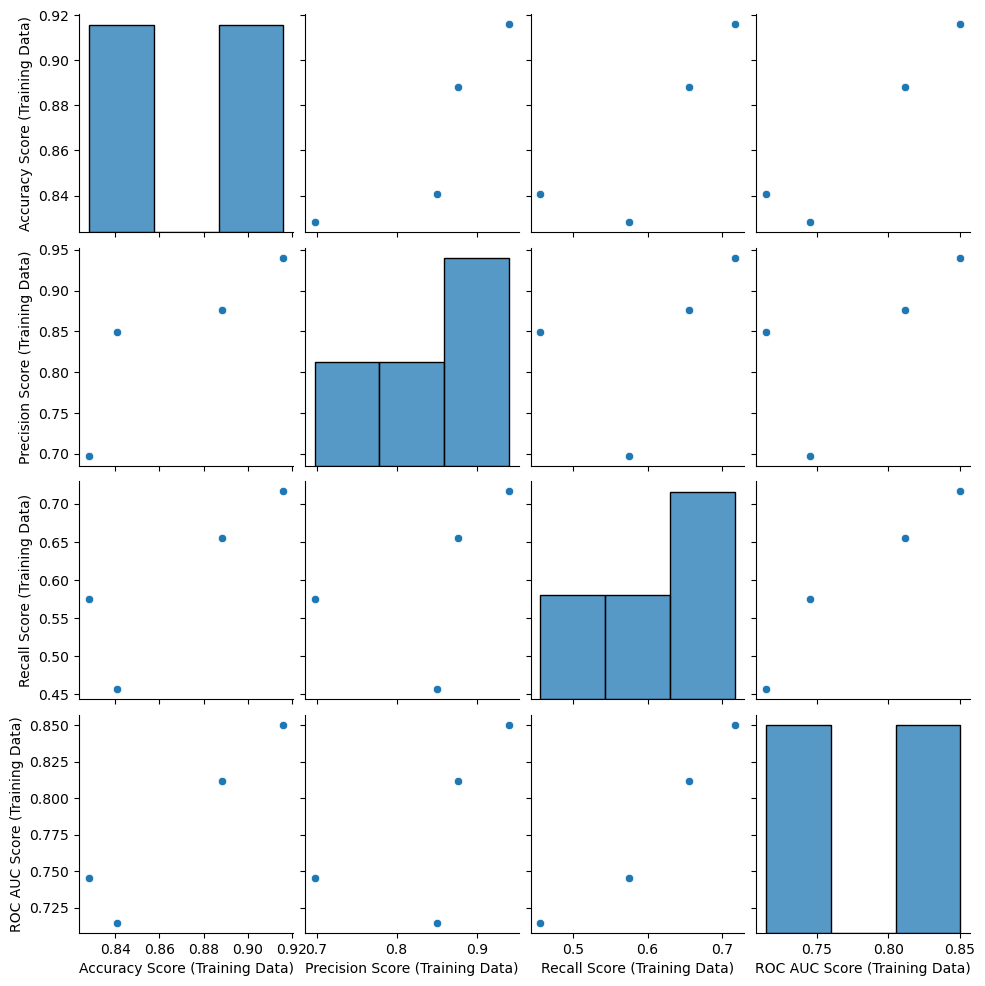

In [219]:
sns.pairplot(df, vars=['Accuracy Score (Training Data)','Precision Score (Training Data)','Recall Score (Training Data)','ROC AUC Score (Training Data)'])
plt.show()

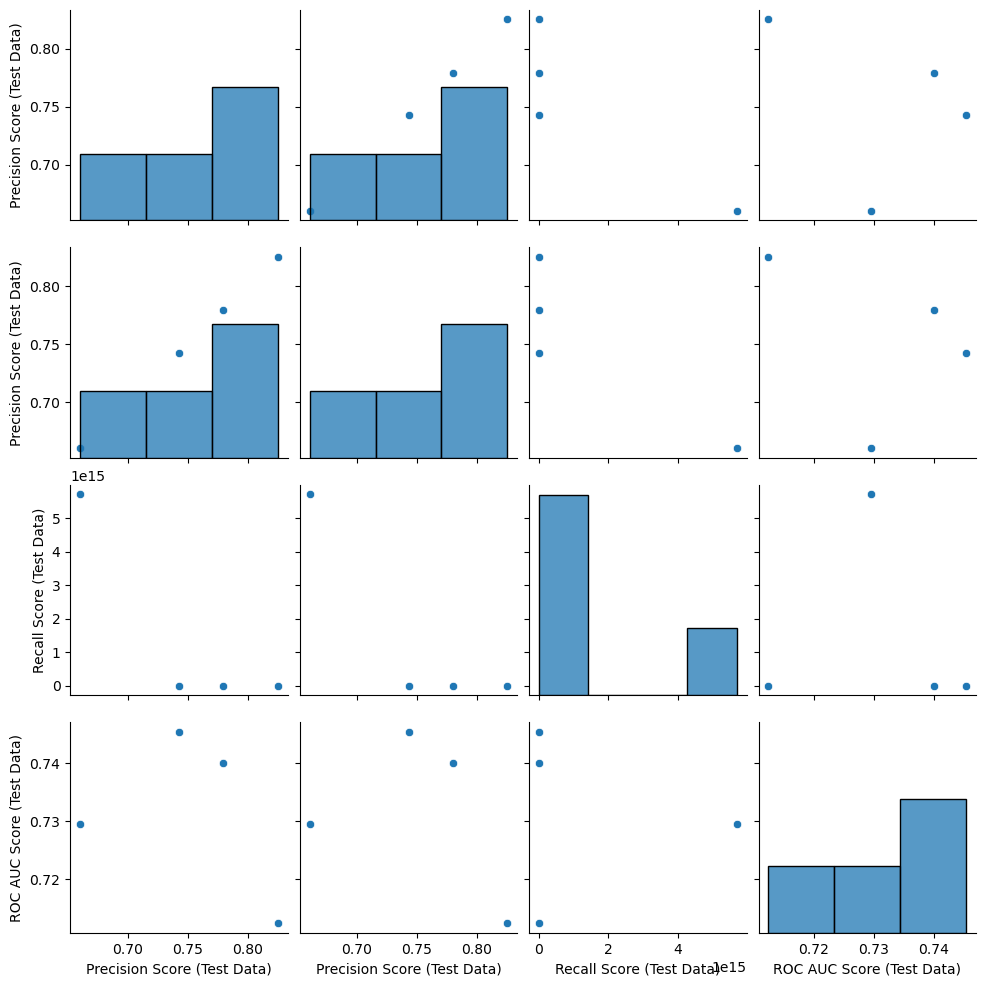

In [220]:
sns.pairplot(df, vars=['Precision Score (Test Data)', 'Precision Score (Test Data)', 'Recall Score (Test Data)','ROC AUC Score (Test Data)'])
plt.show()

<Axes: ylabel='Model'>

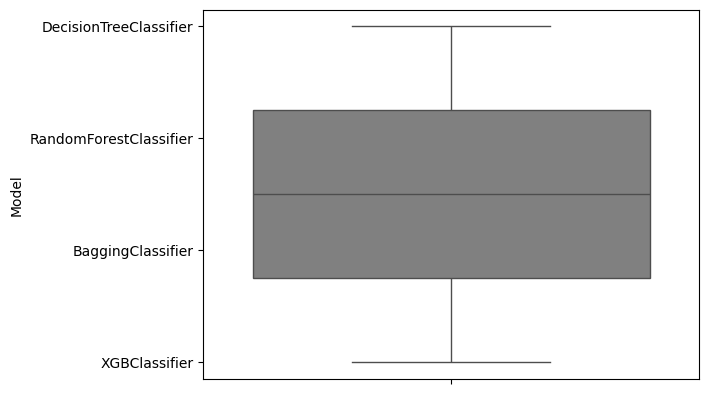

In [254]:
sns.boxplot(df['Model'],color ='grey')

SOME ADDITIONAL INFORMATION 

In [232]:
import numpy as np

print("Feature Data Preview:")
print(x.head())
print("\nTarget Data Preview:")
print(y[:10])  # Print first 10 elements for a quick look

# Check for missing values in features
print("\nMissing Values in Features:")
print(np.isnan(x).sum())

# Check unique values in target
print("\nUnique Values in Target:")
unique_values, counts = np.unique(y, return_counts=True)
print(dict(zip(unique_values, counts)))


Feature Data Preview:
   Model  Accuracy Score (Training Data)  Precision Score (Training Data)  \
0    NaN                        0.828025                         0.697509   
1    NaN                        0.916073                         0.940270   
2    NaN                        0.840764                         0.849727   
3    NaN                        0.888348                         0.876228   

   Recall Score (Training Data)  ROC AUC Score (Training Data)  \
0                      0.575624                       0.745056   
1                      0.716593                       0.850500   
2                      0.456681                       0.714508   
3                      0.654919                       0.811615   

   Precision Score (Test Data)  Recall Score (Test Data)  \
0                     0.660377              5.710000e+15   
1                     0.779528              5.380435e-01   
2                     0.825243              4.619565e-01   
3                    

In [234]:
# Check if there are NaN values in x
if x.isnull().sum().any():
    print("There are missing values in the feature data.")
else:
    print("No missing values in feature data.")

# Check the target after discretization
print("Discretized Target Values:")
print(pd.Series(y).value_counts())


There are missing values in the feature data.
Discretized Target Values:
2.0    3
0.0    1
Name: count, dtype: int64


In [236]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (3, 5)
y_train shape: (3,)
x_test shape: (1, 5)
y_test shape: (1,)


In [238]:
import warnings
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.preprocessing._discretization")

# Load data
df = pd.read_csv('Modelscomp.csv')
print("Initial Data:")
print(df.head())
print(df.info())

# Clean up column names
df.columns = df.columns.str.strip()

# Prepare features and target
x = df.drop(columns=['Accuracy Score (Testing Data)'])
y = df['Accuracy Score (Testing Data)']

print("\nFeatures Data:")
print(x.head())
print(x.info())

print("\nTarget Data:")
print(y.head())
print(y.info())

# Convert features to numeric
x = x.apply(pd.to_numeric, errors='coerce')
print("\nConverted Features Data:")
print(x.head())
print(x.info())

# Convert target variable if necessary
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y = binning.fit_transform(y.values.reshape(-1, 1)).ravel()

print("\nConverted Target Data:")
print(y[:10])  # Print first few elements to check


Initial Data:
                    Model  Accuracy Score (Training Data)  \
0  DecisionTreeClassifier                        0.828025   
1  RandomForestClassifier                        0.916073   
2       BaggingClassifier                        0.840764   
3           XGBClassifier                        0.888348   

   Precision Score (Training Data)  Recall Score (Training Data)  \
0                         0.697509                      0.575624   
1                         0.940270                      0.716593   
2                         0.849727                      0.456681   
3                         0.876228                      0.654919   

   ROC AUC Score (Training Data)  Accuracy Score (Testing Data)  \
0                       0.745056                       0.800898   
1                       0.850500                       0.830838   
2                       0.714508                       0.824850   
3                       0.811615                       0.826347   

   

Step 6: Model Improvement and Ensemble Methods

1. Increase the Number of Trees (Estimators): Random Forest's performance often benefits from increasing the number of decision trees (estimators) in the ensemble. Try increasing the n_estimators parameter to see if it improves the model's performance in predicting rainfall in Sydney.

2. Hyperparameter Tuning: Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. You can use techniques like Grid Search or Randomized Search to find the optimal combination of hyperparameters that work best for Sydney's rainfall data.

3. Feature Selection: Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance. You can use techniques like recursive feature elimination (RFE) or permutation importance to identify the most important features that affect rainfall in Sydney. For example, you may want to explore the importance of features like temperature, humidity, wind speed, and atmospheric pressure.

4. Data Preprocessing: Re-examine the data preprocessing steps to ensure that they are optimal for the selected model. You can try different preprocessing techniques, such as normalization, standardization, or feature scaling, to see if they improve the model's performance. Additionally, you may want to explore techniques like handling missing values, outliers, or seasonal trends in the data.

5. Model Regularization: Regularization techniques like L1 or L2 regularization can help prevent overfitting and improve the model's performance. You can try adding regularization terms to the model's loss function or using techniques like dropout.

6. Incorporate Additional Data Sources: Consider incorporating additional data sources that may be relevant to rainfall prediction in Sydney, such as weather radar data, satellite imagery, or climate indices. This can help improve the model's performance by providing more comprehensive and accurate information.

7. Use Weather Forecasting Models: Explore the use of weather forecasting models like the Weather Research and Forecasting (WRF) model or the Global Forecast System (GFS) model to provide additional inputs to your machine learning model. These models can provide high-resolution weather forecasts that can be used to improve the accuracy of rainfall predictions.

8. Monitor and Update the Model: Finally, it's essential to continuously monitor the performance of the model and update it as necessary. This can involve retraining the model with new data, adjusting the hyperparameters, or incorporating new features or data sources.

